## 6. 

V tem poglavju bomo odgovorili na vprašanje. What criteria is best if we want to minimize the average rank probability of the selected candidates?

In [2]:
import numpy as np
import random
import porocni_problem as fun
import matplotlib.pyplot as plt


n = 100 # število kandidatk
m = 30000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

Za začetek poglčejmo kako se naša uspešnost spreminja s spreminjanjem k. 

In [3]:
k_seznam = [1,3,5,10,15]

In [4]:
velike_vsotke = []

for k in k_seznam:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            sez = fun.Najbolsih_k_partnerjev(tabela_partnerjev[i], stop,k)
            for j in sez:
                vsotke[stop] += j
    velike_vsotke.append(vsotke)

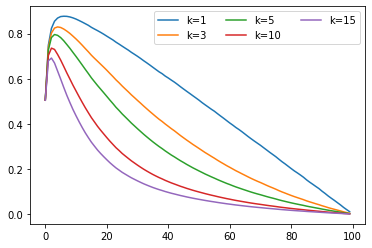

In [5]:
x = [i for i in range(n)]

for i in range(len(k_seznam)):
    verjetnosti = [x / m / n / k_seznam[i] for x in velike_vsotke[i]]
    plt.plot(x, verjetnosti, label = f'k={k_seznam[i]}' )

plt.legend(ncol=3)
plt.show()

In [6]:
for i in range(len(k_seznam)): print(np.argmax(velike_vsotke[i]))

6
4
3
2
2


Kaj pa če poizkusimo z metodo povprečja.

In [7]:
k = 5

Poglejmo kakose spreminja z alphami naš graf za k = 5.

In [8]:
alpha_seznam = [1.5, 1.6, 1.7, 1.8, 1.9]

In [9]:
velike_vsotke_alpha = []

for alf in alpha_seznam:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            sez = fun.Najbolsih_k_partnerjev_povprecje(tabela_partnerjev[i], stop, alf, k)
            for j in sez:
                vsotke[stop] += j
    velike_vsotke_alpha.append(vsotke)

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


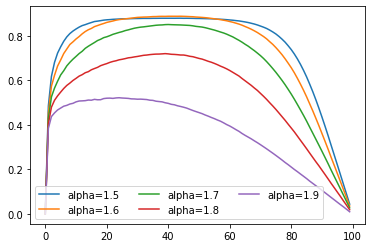

In [10]:
x = [i for i in range(n)]

for i in range(len(alpha_seznam)):
    verjetnosti = [x / m / n / k  for x in velike_vsotke_alpha[i]]
    plt.plot(x, verjetnosti, label = f'alpha={alpha_seznam[i]}' )

plt.legend(ncol=3)
plt.show()

Narišimo ju še skupaj

In [11]:
k = 5
alpha = 1.6

In [12]:
vsotke_pov = [0] * n
for stop in range(n):
    for i in range(m):
        sez = fun.Najbolsih_k_partnerjev_povprecje(tabela_partnerjev[i], stop, alpha ,k)
        for j in sez:
            vsotke_pov[stop] += j

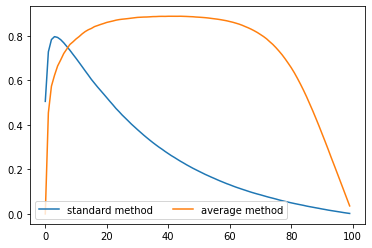

In [13]:
verjetnosti = [x / m /n /k for x in velike_vsotke[2]]
verjetnosti_pov = [x / m /n /k for x in vsotke_pov]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label='standard method')
plt.plot(x, verjetnosti_pov, label='average method')
plt.legend(ncol=3)
plt.show()

Naslednje vprašanje, ki ga še pogledmao v tem poglavju je:
What criteria is best if we want to hire
k people and want to minimize the rank of the worse one that was hired?

In [14]:
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

In [15]:
k_seznam = [1,3,5,10,15]

In [16]:
velike_vsotke = []

for k in k_seznam:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            minimalni = min(fun.Najbolsih_k_partnerjev(tabela_partnerjev[i], stop,k))
            vsotke[stop] += minimalni
    velike_vsotke.append(vsotke)

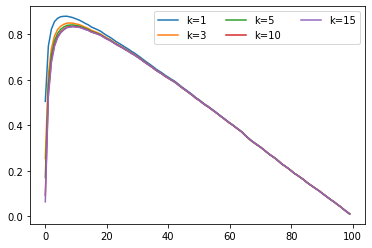

In [17]:
x = [i for i in range(n)]

for i in range(len(k_seznam)):
    verjetnosti = [j / m / n for j in velike_vsotke[i]]
    plt.plot(x, verjetnosti, label = f'k={k_seznam[i]}' )

plt.legend(ncol=3)
plt.show()

Po eni strani opazimo, da tukanj ni velike razlike med k-ji.

In [18]:
k = 5
alpha_seznam = [1.5, 1.6, 1.7, 1.8, 1.9]

In [19]:
velike_vsotke_alpha = []

for alf in alpha_seznam:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            minimalni = min(fun.Najbolsih_k_partnerjev_povprecje(tabela_partnerjev[i], stop, alf, k))
            vsotke[stop] += minimalni
    velike_vsotke_alpha.append(vsotke)

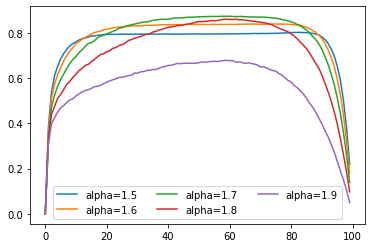

In [20]:
x = [i for i in range(n)]

for i in range(len(alpha_seznam)):
    verjetnosti = [x / m / n   for x in velike_vsotke_alpha[i]]
    plt.plot(x, verjetnosti, label = f'alpha={alpha_seznam[i]}' )

plt.legend(ncol=3)
plt.show()

Skupaj.

In [21]:
k = 5
alpha = 1.7

In [22]:
vsotke_pov = [0] * n
for stop in range(n):
    for i in range(m):
        minimal = min(fun.Najbolsih_k_partnerjev_povprecje(tabela_partnerjev[i], stop, alpha ,k))
        vsotke_pov[stop] += minimal

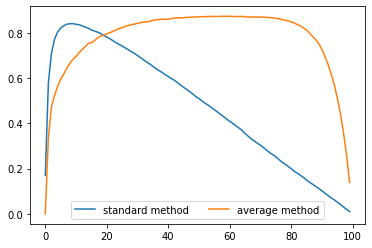

In [23]:
verjetnosti = [x / m /n  for x in velike_vsotke[2]]
verjetnosti_pov = [x / m /n  for x in vsotke_pov]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label='standard method')
plt.plot(x, verjetnosti_pov, label='average method')
plt.legend(ncol=3)
plt.show()

In [24]:
[np.argmax(velike_vsotke[2]), np.argmax(vsotke_pov)]

[9, 60]